In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

#read the excel files
df_tree_train = pd.read_csv('C:/Users/MI/Desktop/training.csv')
df_tree_test = pd.read_csv('C:/Users/MI/Desktop/testing.csv')

#combine both excel files
frames = [df_tree_train, df_tree_test]
df_tree = pd.concat(frames)

#sort by class
df_tree = df_tree.sort_values(by=['class'])

df_tree.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
141,d,52,44,73,82,58,94,71,23,51,...,5.69,-20.65,-1.15,-5.53,-22.36,-1.08,-5.16,-18.75,-2.08,-4.75
140,d,50,40,62,113,60,106,99,28,59,...,-3.72,-15.17,-0.53,-2.59,-18.07,-0.64,-3.09,-13.33,-1.74,-3.83
139,d,47,33,56,90,64,102,89,29,59,...,-2.35,-18.25,-1.04,-3.17,-22.60,-0.80,-4.18,-18.60,-2.38,-4.74
137,d,55,38,61,90,57,96,85,24,56,...,0.99,-18.19,-1.84,-3.91,-23.80,-0.84,-4.33,-18.80,-2.54,-4.98


In [218]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

C:\Users\MI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


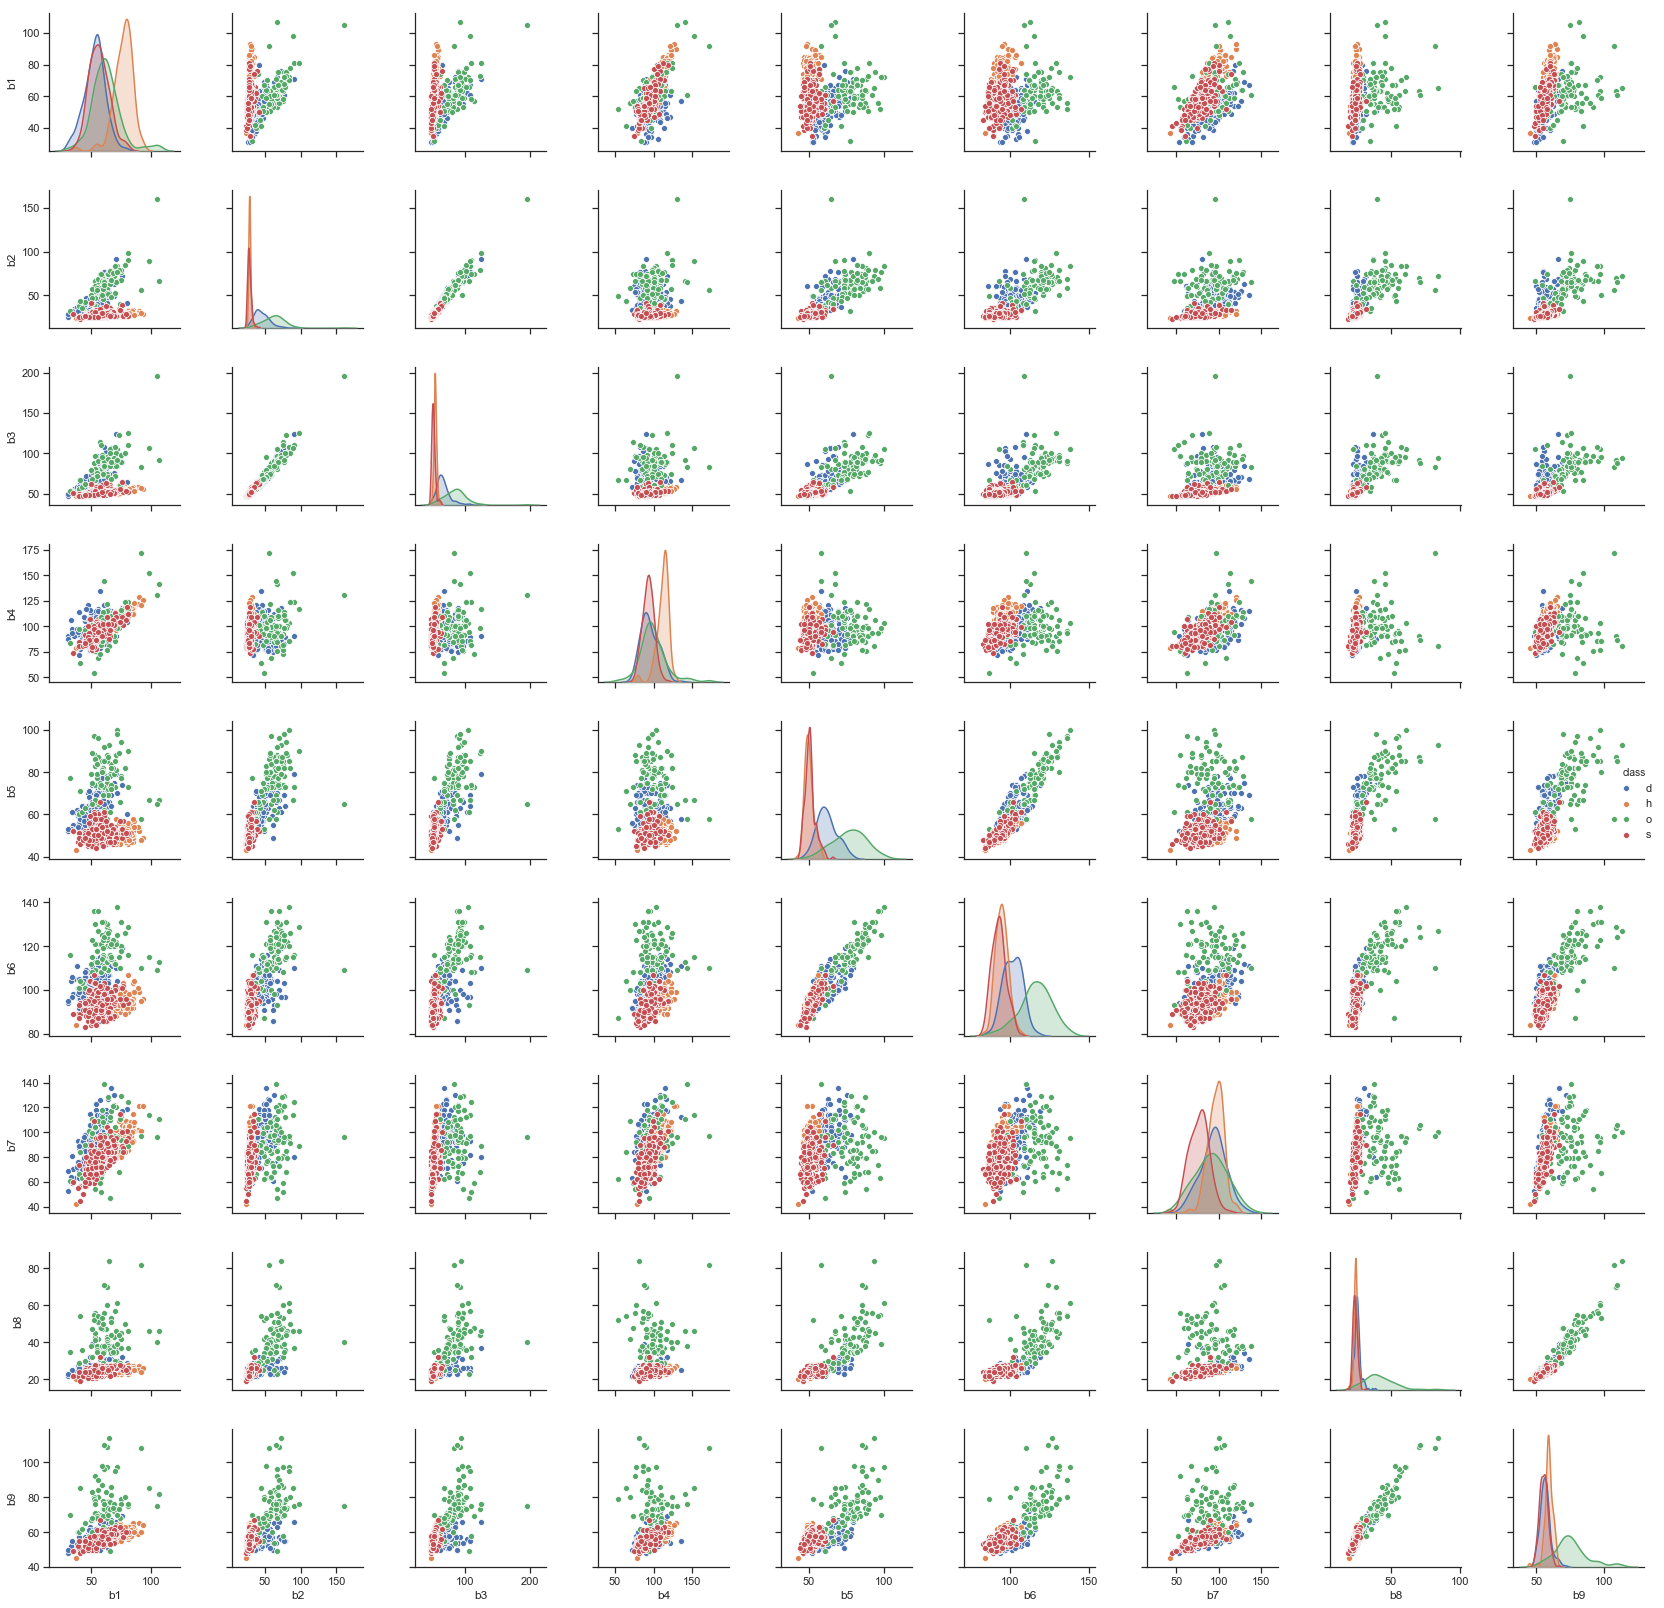

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
cols = ['class', 'b1', 'b2', 'b3','b4','b5','b5','b6','b7','b8','b9']

cols = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
sns.pairplot(df_tree[cols], hue="class", height = 2.5)

plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [220]:
#df_tree = pd.DataFrame(df_tree)
#df_tree = df_tree.replace(to_replace=['d','h','o','s'], 
                #value=['1','2','3','4'], regex=True)

class_mapping={label:idx for idx,label in enumerate(np.unique(df_tree['class']))}
df_tree['class']=df_tree['class'].map(class_mapping)

#y=df.iloc[0:523,0].values
#change the features to test the accuracy
X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

print(df_tree)

     class  b1  b2  b3   b4  b5   b6   b7  b8  b9         ...           \
0        0  39  36  57   91  59  101   93  27  60         ...            
141      0  52  44  73   82  58   94   71  23  51         ...            
140      0  50  40  62  113  60  106   99  28  59         ...            
139      0  47  33  56   90  64  102   89  29  59         ...            
137      0  55  38  61   90  57   96   85  24  56         ...            
134      0  53  41  62  106  62  105   80  27  57         ...            
131      0  57  53  69  105  64  105  114  26  58         ...            
130      0  39  35  59   93  60  101   71  23  50         ...            
128      0  51  39  60   97  61  103   77  22  52         ...            
145      0  59  60  79   83  71  104   94  26  56         ...            
127      0  57  36  60   86  60   97   89  26  58         ...            
126      0  35  32  53   95  55   98   70  24  51         ...            
122      0  59  43  65   88  64   99  

In [221]:
from sklearn.model_selection import train_test_split

X, y = df_tree.iloc[:, 1:].values, df_tree.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [222]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [223]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.0256e+01 4.9204e+00 3.6215e+00 1.9806e+00 1.4220e+00 1.5053e+00
 8.8227e-01 6.4266e-01 5.6305e-01 3.9580e-01 3.3062e-01 1.9252e-01
 1.1279e-01 6.4722e-02 5.7918e-02 3.3255e-02 2.6346e-02 2.4892e-02
 2.0492e-02 9.6022e-03 5.4642e-03 2.7777e-03 2.3133e-03 7.4481e-04
 1.9674e-04 2.2689e-05 8.2663e-05]


In [224]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

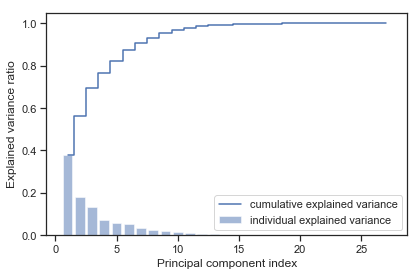

In [225]:
import matplotlib.pyplot as plt


plt.bar(range(1, 28), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 28), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [226]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [227]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1136  0.1015]
 [-0.2737 -0.0993]
 [-0.2683 -0.0858]
 [-0.0876  0.0957]
 [-0.2677 -0.1313]
 [-0.2715 -0.0995]
 [-0.1338  0.0092]
 [-0.2682 -0.0681]
 [-0.2705 -0.043 ]
 [ 0.1192 -0.1454]
 [ 0.2708  0.0835]
 [ 0.2607  0.0573]
 [ 0.1055 -0.1691]
 [ 0.2687  0.1235]
 [ 0.2779  0.0698]
 [ 0.1439 -0.0536]
 [ 0.2689  0.0465]
 [ 0.2723  0.0167]
 [-0.0466  0.2354]
 [-0.054   0.2737]
 [-0.063   0.3194]
 [-0.0714  0.2975]
 [-0.0714  0.3154]
 [-0.0791  0.3581]
 [-0.0702  0.3085]
 [-0.0719  0.3017]
 [-0.0728  0.3307]]


In [228]:
X_train_std[0].dot(w)

array([-1.0006, -0.3437])

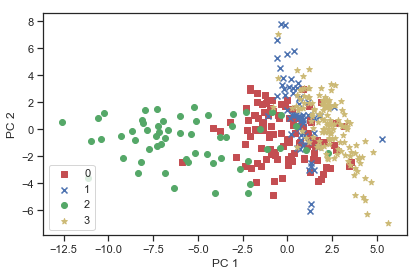

In [229]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [230]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.7880e-01, 1.8174e-01, 1.3376e-01, 7.3156e-02, 5.5601e-02,
       5.2523e-02, 3.2588e-02, 2.3737e-02, 2.0797e-02, 1.4619e-02,
       1.2212e-02, 7.1108e-03, 4.1660e-03, 2.3906e-03, 2.1392e-03,
       1.2283e-03, 9.7310e-04, 9.1941e-04, 7.5690e-04, 3.5467e-04,
       2.0182e-04, 1.0260e-04, 8.5445e-05, 2.7510e-05, 7.2669e-06,
       3.0532e-06, 8.3804e-07])

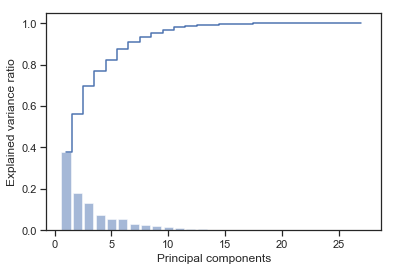

In [231]:
plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [232]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

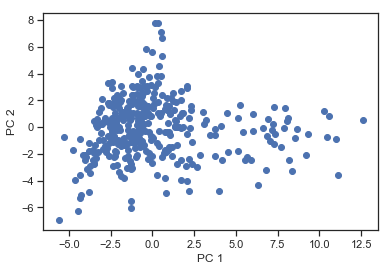

In [233]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [234]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '*', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [235]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

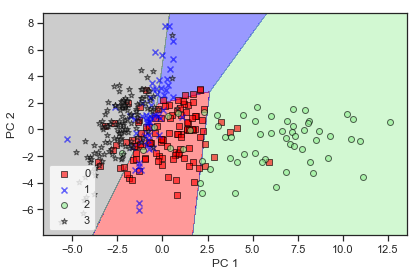

In [236]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

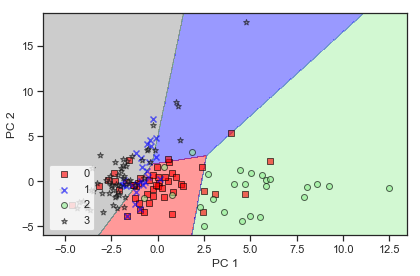

In [237]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [238]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.7880e-01, 1.8174e-01, 1.3376e-01, 7.3156e-02, 5.5601e-02,
       5.2523e-02, 3.2588e-02, 2.3737e-02, 2.0797e-02, 1.4619e-02,
       1.2212e-02, 7.1108e-03, 4.1660e-03, 2.3906e-03, 2.1392e-03,
       1.2283e-03, 9.7310e-04, 9.1941e-04, 7.5690e-04, 3.5467e-04,
       2.0182e-04, 1.0260e-04, 8.5445e-05, 2.7510e-05, 7.2669e-06,
       3.0532e-06, 8.3804e-07])

In [239]:
#Supervised data compression via linear discriminant analysis

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 4):
    print(label)
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label]))

0
MV 0: [-0.5524  0.3804  0.286  -0.1877  0.3485  0.2223  0.4569 -0.2186 -0.3147
  0.5498 -0.3673 -0.2717  0.2266 -0.3474 -0.2166 -0.4354  0.2409  0.3398
 -0.03   -0.1345 -0.1339  0.0283  0.011  -0.0523 -0.0538 -0.1107 -0.1292]

1
MV 1: [ 1.4197 -0.6412 -0.4858  1.1161 -0.6927 -0.4521  0.5528 -0.3593 -0.0119
 -1.3758  0.6117  0.431  -1.0813  0.6865  0.4344 -0.5321  0.3455 -0.0041
 -0.0687  0.1145  0.0231  0.0452 -0.1331 -0.1263 -0.0484  0.2119  0.1723]

2
MV 2: [ 0.3168  1.5405  1.5017  0.1517  1.6453  1.6374  0.1511  1.8309  1.7555
 -0.3412 -1.5138 -1.4394 -0.2313 -1.6469 -1.6618 -0.1997 -1.8265 -1.7575
  0.1613  0.181   0.1906  0.1239  0.1441  0.2285  0.2063  0.1821  0.1891]

3
MV 3: [-0.3083 -0.6796 -0.6547 -0.4009 -0.6756 -0.6754 -0.6763 -0.4407 -0.483
  0.3015  0.6706  0.6408  0.3879  0.6781  0.6887  0.6704  0.4268  0.4705
 -0.0139 -0.0178  0.0177 -0.0951 -0.0116  0.0009 -0.0225 -0.0802 -0.0509]



In [240]:
d = 27 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 27x27


In [241]:
mean_overall = np.mean(X_train_std, axis=0)
d = 27  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 27x27


In [242]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [243]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

8.57371101812431
1.9403802644588413
0.23787562362951115
1.161259882259038e-11
4.466760420924095e-12
4.466760420924095e-12
3.382674531906123e-12
3.382674531906123e-12
8.82081637518383e-13
8.82081637518383e-13
7.259353767529959e-13
3.942536306008356e-13
3.942536306008356e-13
9.831796687003903e-14
9.831796687003903e-14
6.887378398235193e-14
6.887378398235193e-14
2.125481470588935e-14
2.125481470588935e-14
1.4315369557197142e-14
1.3041875458751944e-14
7.656240144747386e-15
4.455510794721133e-15
4.455510794721133e-15
4.379997968595713e-15
4.379997968595713e-15
1.3809521477810744e-15


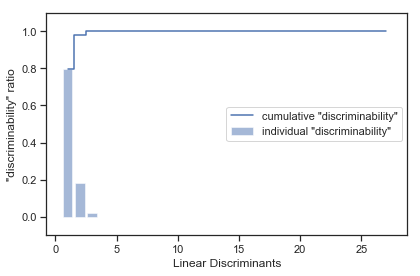

In [244]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 28), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 28), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [245]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0651  0.0855]
 [-0.4529 -0.1894]
 [ 0.3524  0.1211]
 [-0.082   0.1064]
 [ 0.2679  0.4034]
 [-0.0317 -0.2783]
 [ 0.1532 -0.2051]
 [ 0.1997  0.1392]
 [-0.2856 -0.2607]
 [-0.164  -0.0209]
 [-0.2592 -0.1036]
 [ 0.282   0.1101]
 [-0.0613  0.0909]
 [ 0.3319  0.3706]
 [-0.048  -0.2757]
 [ 0.1402 -0.1145]
 [ 0.2492  0.2802]
 [-0.2472 -0.4717]
 [-0.0394  0.0063]
 [-0.0184  0.0115]
 [ 0.0321 -0.0111]
 [ 0.0087  0.0164]
 [ 0.0285 -0.0014]
 [-0.0474 -0.022 ]
 [ 0.0162 -0.0185]
 [-0.0389  0.0189]
 [ 0.0387 -0.024 ]]


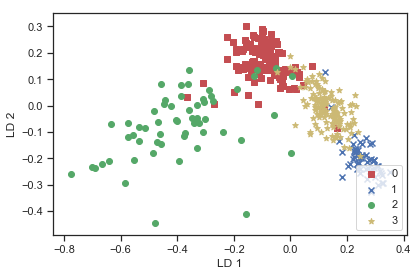

In [246]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [247]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

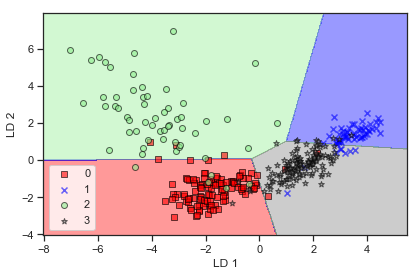

In [248]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

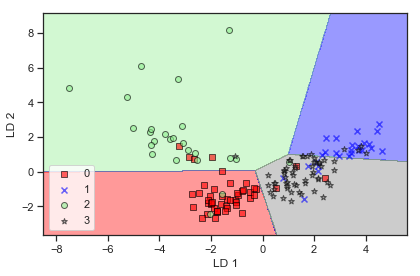

In [249]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()